# PCA


### Import thư viện cần thiết

In [37]:
import pandas as pd
import numpy as np
from numpy.random import uniform
from random import sample
from math import isnan

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

# Import Libraries for Data visualizations
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.lines import Line2D
%matplotlib inline

### Load file data

In [38]:
country_data = pd.read_csv('data/Country-data.csv')
country_data.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


### Số lượng dòng và cột

In [39]:
country_data.shape

(167, 10)

Dataset có 167 dòng và 10 cột

### Các cột của dataset

In [40]:
country_data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

### Kiểu dữ liệu của các cột

In [41]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


### Phân tích các cột

In [42]:
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### Tiền xử lý dữ liệu

Ta đổi tên các cột tên để cho việc quan sát dữ liệu dễ hơn

In [43]:
country_data.columns=["Country", "Child_Mortality", "Exports", "Health_Spending","Imports","Income","Inflation","Life_Expectancy","Total_Fertility","GDP_per_capita"]
country_data.head(10)

,Country,Child_Mortality,Exports,Health_Spending,Imports,Income,Inflation,Life_Expectancy,Total_Fertility,GDP_per_capita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


Kiểm tra trùng lắp giữa các dòng

In [44]:
print(sum(country_data.duplicated(subset = 'Country')) == 0)

True


Kiểm tra missing values

In [45]:
country_data.isnull().sum()

Country            0
Child_Mortality    0
Exports            0
Health_Spending    0
Imports            0
Income             0
Inflation          0
Life_Expectancy    0
Total_Fertility    0
GDP_per_capita     0
dtype: int64

Không có missing values

### Khám phá dữ liệu

#### 1. Dữ liệu catelogical

In [46]:
cate_cols = country_data.select_dtypes(include=['object']).columns
cate_cols

Index(['Country'], dtype='object')

Bộ dữ liệu chỉ có duy nhất một cột catelogical là `Country`

In [47]:
print("Số các quốc gia: ", country_data.Country.nunique())
print("Các quốc gia bao gồm : ", country_data.Country.unique())

Số các quốc gia:  167
Các quốc gia bao gồm :  ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Cape Verde' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana'
 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel'
 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Kiribati'
 'Kuwait' 'Kyrgyz Republic' '

#### 2. Dữ liệu kiểu Numeric

In [48]:
numerical_cols = country_data.select_dtypes(include=[np.number]).columns
numerical_cols

Index(['Child_Mortality', 'Exports', 'Health_Spending', 'Imports', 'Income',
       'Inflation', 'Life_Expectancy', 'Total_Fertility', 'GDP_per_capita'],
      dtype='object')

Các cột còn lại đều có kiểu Numeric

In [49]:
country_data[numerical_cols].head(10)

,Child_Mortality,Exports,Health_Spending,Imports,Income,Inflation,Life_Expectancy,Total_Fertility,GDP_per_capita
0,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


Ở đây. các cột `Exports`, `Imports` và `Health_Spending` ở dạng phần trăm trong khi các cột khác đều mang giá trị tuyệt đối

Các cột mang giá trị phần trăm sẽ được chuyển đổi tỷ lệ phần trăm thành số tuyệt đối bằng cách sử dụng GDP của quốc gia tương ứng.

In [50]:
country_data['Exports'] = country_data['Exports']*country_data['GDP_per_capita']/100
country_data['Imports'] = country_data['Imports']*country_data['GDP_per_capita']/100
country_data['Health_Spending'] = country_data['Health_Spending']*country_data['GDP_per_capita']/100

In [51]:
country_data.head(10)

,Country,Child_Mortality,Exports,Health_Spending,Imports,Income,Inflation,Life_Expectancy,Total_Fertility,GDP_per_capita
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.440,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.100,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,1946.70,834.3000,1648.000,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,669.76,141.6800,1458.660,6700,7.770,73.3,1.69,3220
7,Australia,4.8,10276.20,4530.8700,10847.100,41400,1.160,82.0,1.93,51900
8,Austria,4.3,24059.70,5159.0000,22418.200,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,3171.12,343.3920,1208.880,16000,13.800,69.1,1.92,5840


In [52]:
country_data.describe()

,Child_Mortality,Exports,Health_Spending,Imports,Income,Inflation,Life_Expectancy,Total_Fertility,GDP_per_capita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


#### Xác định các outliners và loại bỏ chúng

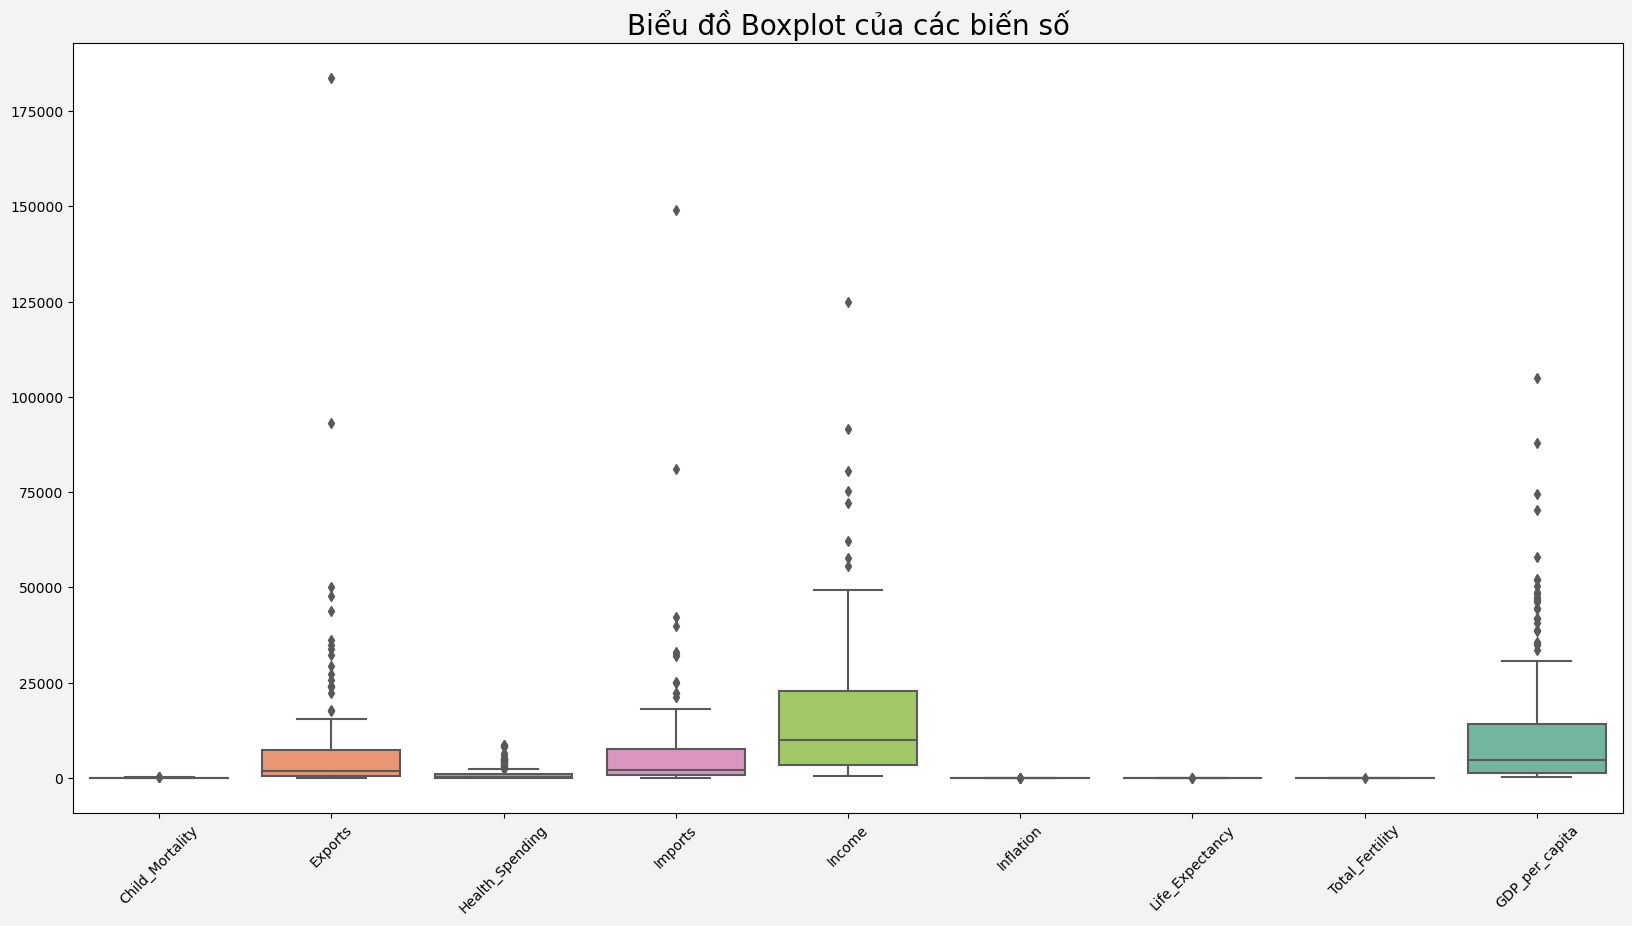

In [53]:
fig = plt.figure(figsize=(20, 10))
fig.set_facecolor('#F3F3F3')
a = sns.boxplot(data = country_data, palette = 'Set2')
plt.title('Biểu đồ Boxplot của các biến số', fontsize = 20, fontweight = 30)
plt.xticks(rotation = 45)
plt.show()

Từ biểu đồ ta thấy, các outliners xuất hiện ở các cột `Exports`, `Health_Spending`, `Imports`, `Income` và `GDP`

Ta sẽ xử lý outliners ở phần sau

#### Vẽ heatmap để xác định mối tương quan giữa các dữ liệu

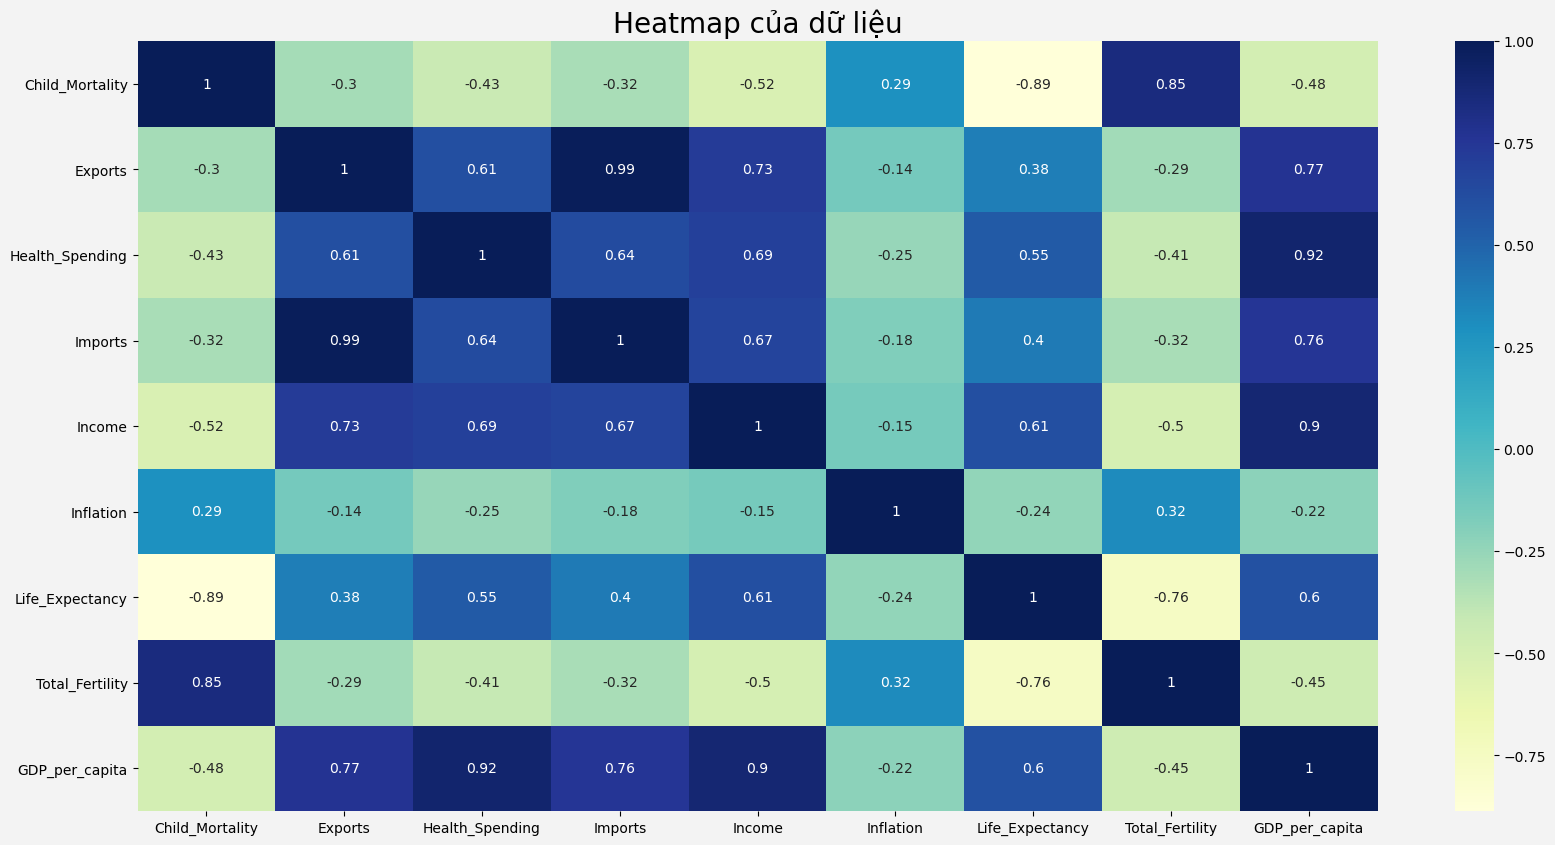

In [54]:
fig = plt.figure(figsize=(20, 10))
fig.set_facecolor('#F3F3F3')
a = sns.heatmap(country_data.corr(), annot = True, cmap = 'YlGnBu')
plt.title('Heatmap của dữ liệu', fontsize = 20, fontweight = 30)
plt.show()


- Xuất khẩu, nhập khẩu, chi tiêu y tế, thu nhập có mối tương quan chặt chẽ với GDP bình quân đầu người.
- Các biến số này cũng được quan sát có mối tương quan cao với nhau.
- Mô hình PCA không cần dữ liệu có độ tương quan cao để hoạt động chính xác nhưng cần thiết và chỉ có thể áp dụng được khi dữ liệu có độ tương quan cao.

Do đó, phân tích PCA sẽ được thực hiện mà không cần sửa đổi thêm trong tập dữ liệu.

### Thực hiện PCA

PCA bị ảnh hưởng bởi quy mô, vì vậy bạn cần phải mở rộng quy mô các tính năng trong dữ liệu của mình trước khi áp dụng PCA.

Sử dụng StandardScaler để giúp bạn chuẩn hóa các tính năng của tập dữ liệu theo thang đơn vị, đây là yêu cầu để có hiệu suất tối ưu của nhiều thuật toán học máy.

In [55]:
class StandardScaler:
    def __init__(self):
        self.mean = None
        self.std = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        
    def transform(self, X):
        return (X - self.mean) / self.std

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

In [56]:
country_data1=country_data.drop('Country',1)
scaler = StandardScaler()
country_data_scaled = scaler.fit_transform(country_data1)
country_data_scaled.head(10)

,Child_Mortality,Exports,Health_Spending,Imports,Income,Inflation,Life_Expectancy,Total_Fertility,GDP_per_capita
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817
5,-0.591177,-0.305464,-0.123849,-0.336841,0.080920,1.244725,0.591474,-0.382933,-0.145791
6,-0.501643,-0.376722,-0.509493,-0.349751,-0.543421,-0.001123,0.309514,-0.833471,-0.533233
7,-0.832423,0.159352,1.934367,0.290369,1.261966,-0.628316,1.290735,-0.674457,2.130699
8,-0.844858,0.928521,2.284104,1.079305,1.355617,-0.655549,1.121559,-0.999109,1.857082
9,0.023128,-0.237137,-0.397182,-0.366781,-0.059556,0.571037,-0.164178,-0.681083,-0.389857


Cài đặt PCA

In [57]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        X = X - self.mean
        cov = np.cov(X.T)
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        self.components = eigenvectors[0:self.n_components]

    def transform(self, X):
        X = X - self.mean
        return np.dot(X, self.components.T)

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)


#### Giảm chiều dữ liệu về còn 3 chiều

In [58]:
pca = PCA(3)
country_data_pca = pca.fit_transform(country_data_scaled)


#### Trực quan hoá

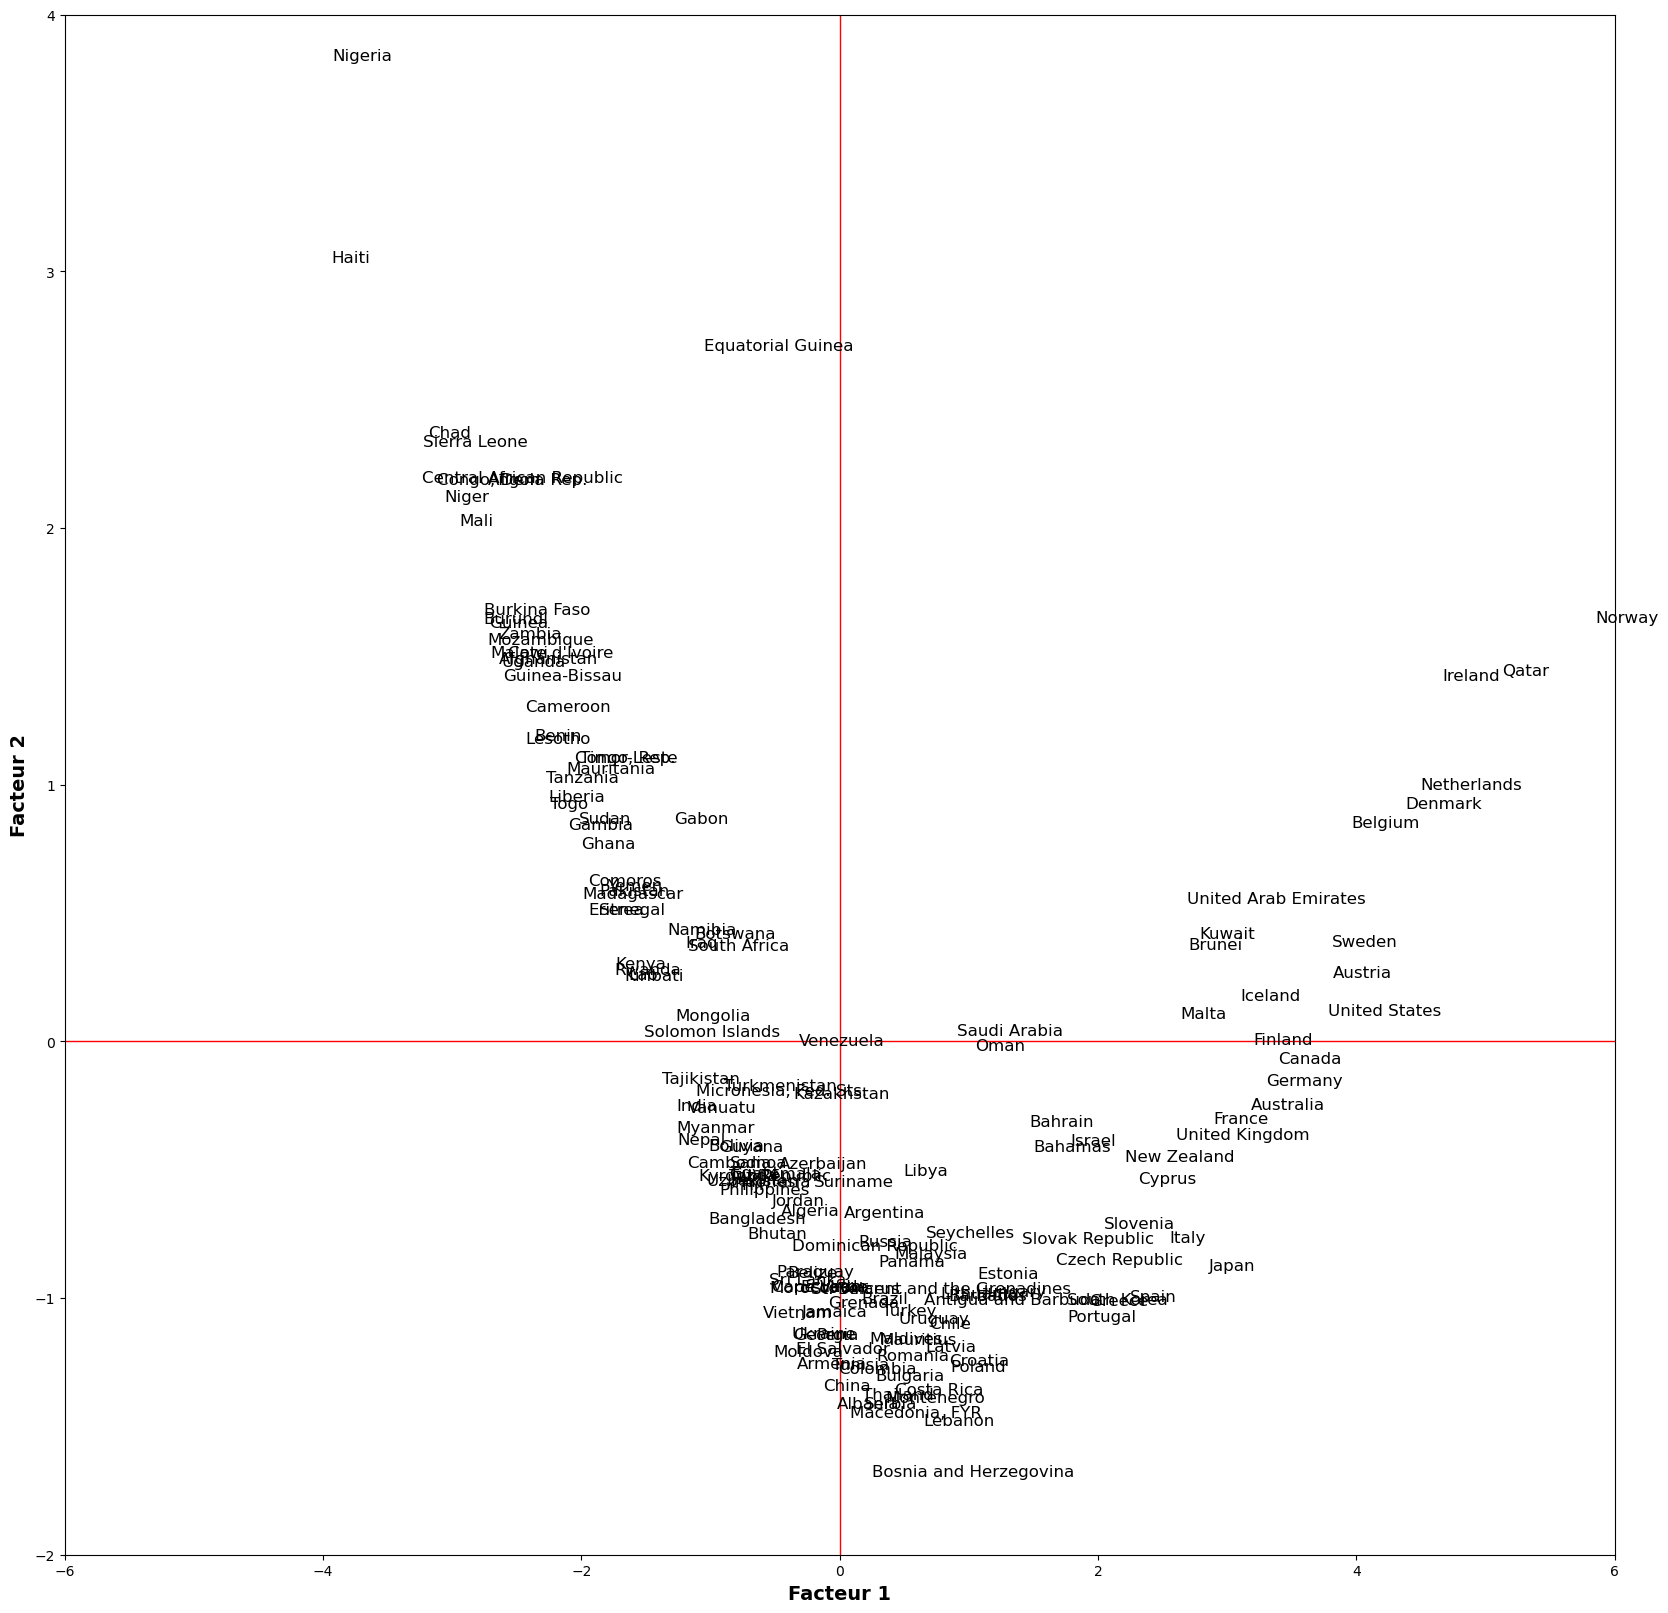

In [59]:
fig, axes = plt.subplots(figsize=(20,20))
limite = 6
axes.set_xlim(-limite,limite)
axes.set_ylim(-limite+4,limite-2)
for i in range(country_data.shape[0]):
    plt.annotate(country_data.Country[i],(country_data_pca[i,0],country_data_pca[i,1]), fontsize=12)
plt.plot([-limite,limite],[0,0],color='red',linestyle='-',linewidth=1)
plt.plot([0,0],[-limite,limite],color='red',linestyle='-',linewidth=1)
plt.xlabel("Facteur 1", fontsize=14,fontweight='bold')
plt.ylabel("Facteur 2", fontsize=14,fontweight='bold')
plt.show()

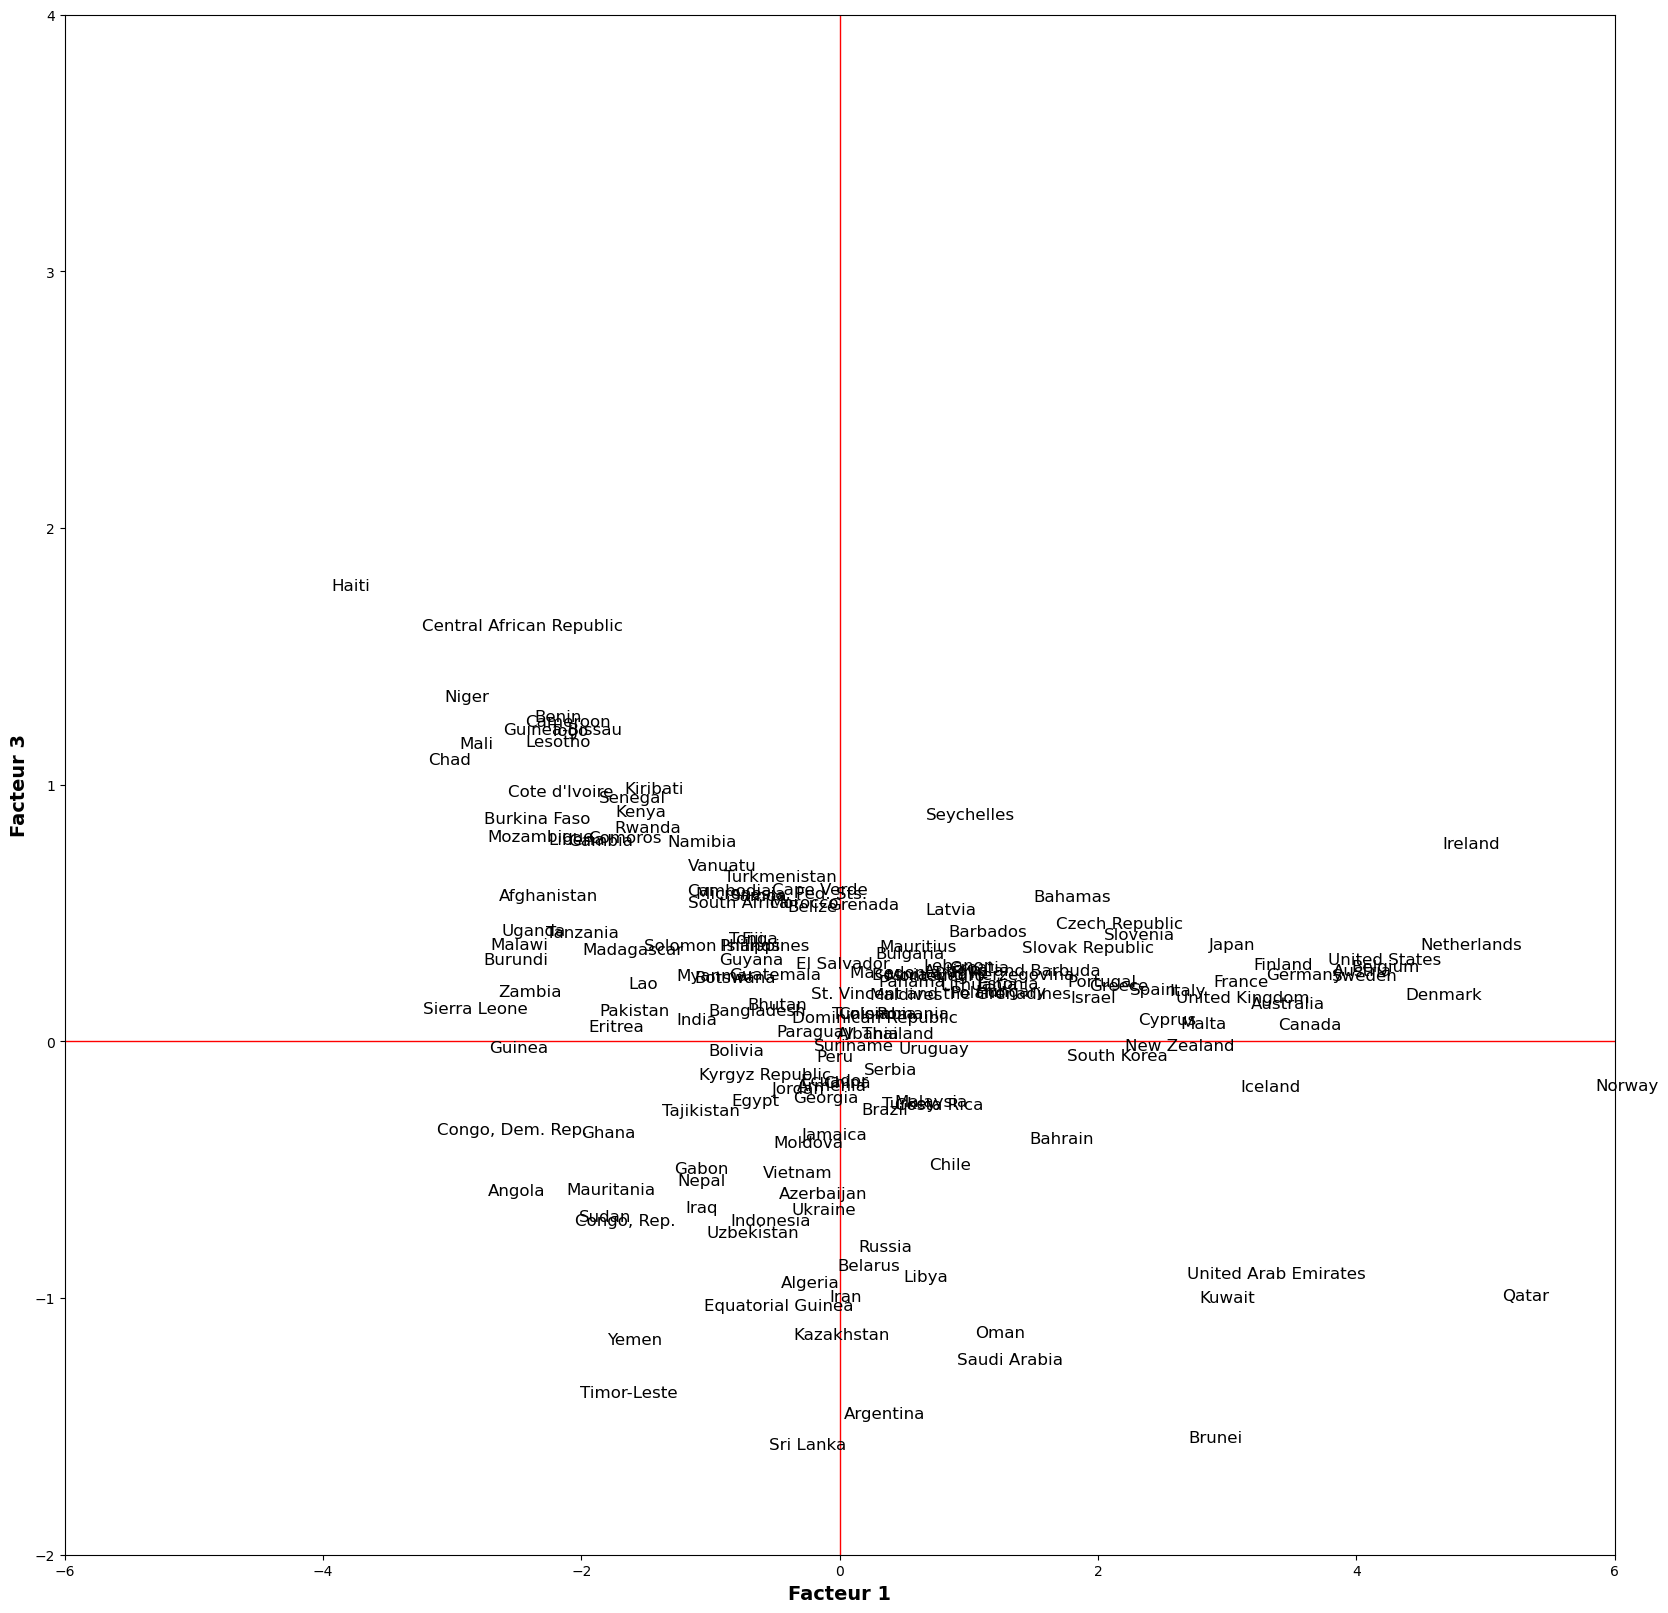

In [60]:
fig, axes = plt.subplots(figsize=(20,20))
limite = 6
axes.set_xlim(-limite,limite)
axes.set_ylim(-limite+4,limite-2)
for i in range(country_data.shape[0]):
    plt.annotate(country_data.Country[i],(country_data_pca[i,0],country_data_pca[i,2]), fontsize=12)
plt.plot([-limite,limite],[0,0],color='red',linestyle='-',linewidth=1)
plt.plot([0,0],[-limite,limite],color='red',linestyle='-',linewidth=1)
plt.xlabel("Facteur 1", fontsize=14,fontweight='bold')
plt.ylabel("Facteur 3", fontsize=14,fontweight='bold')
plt.show()

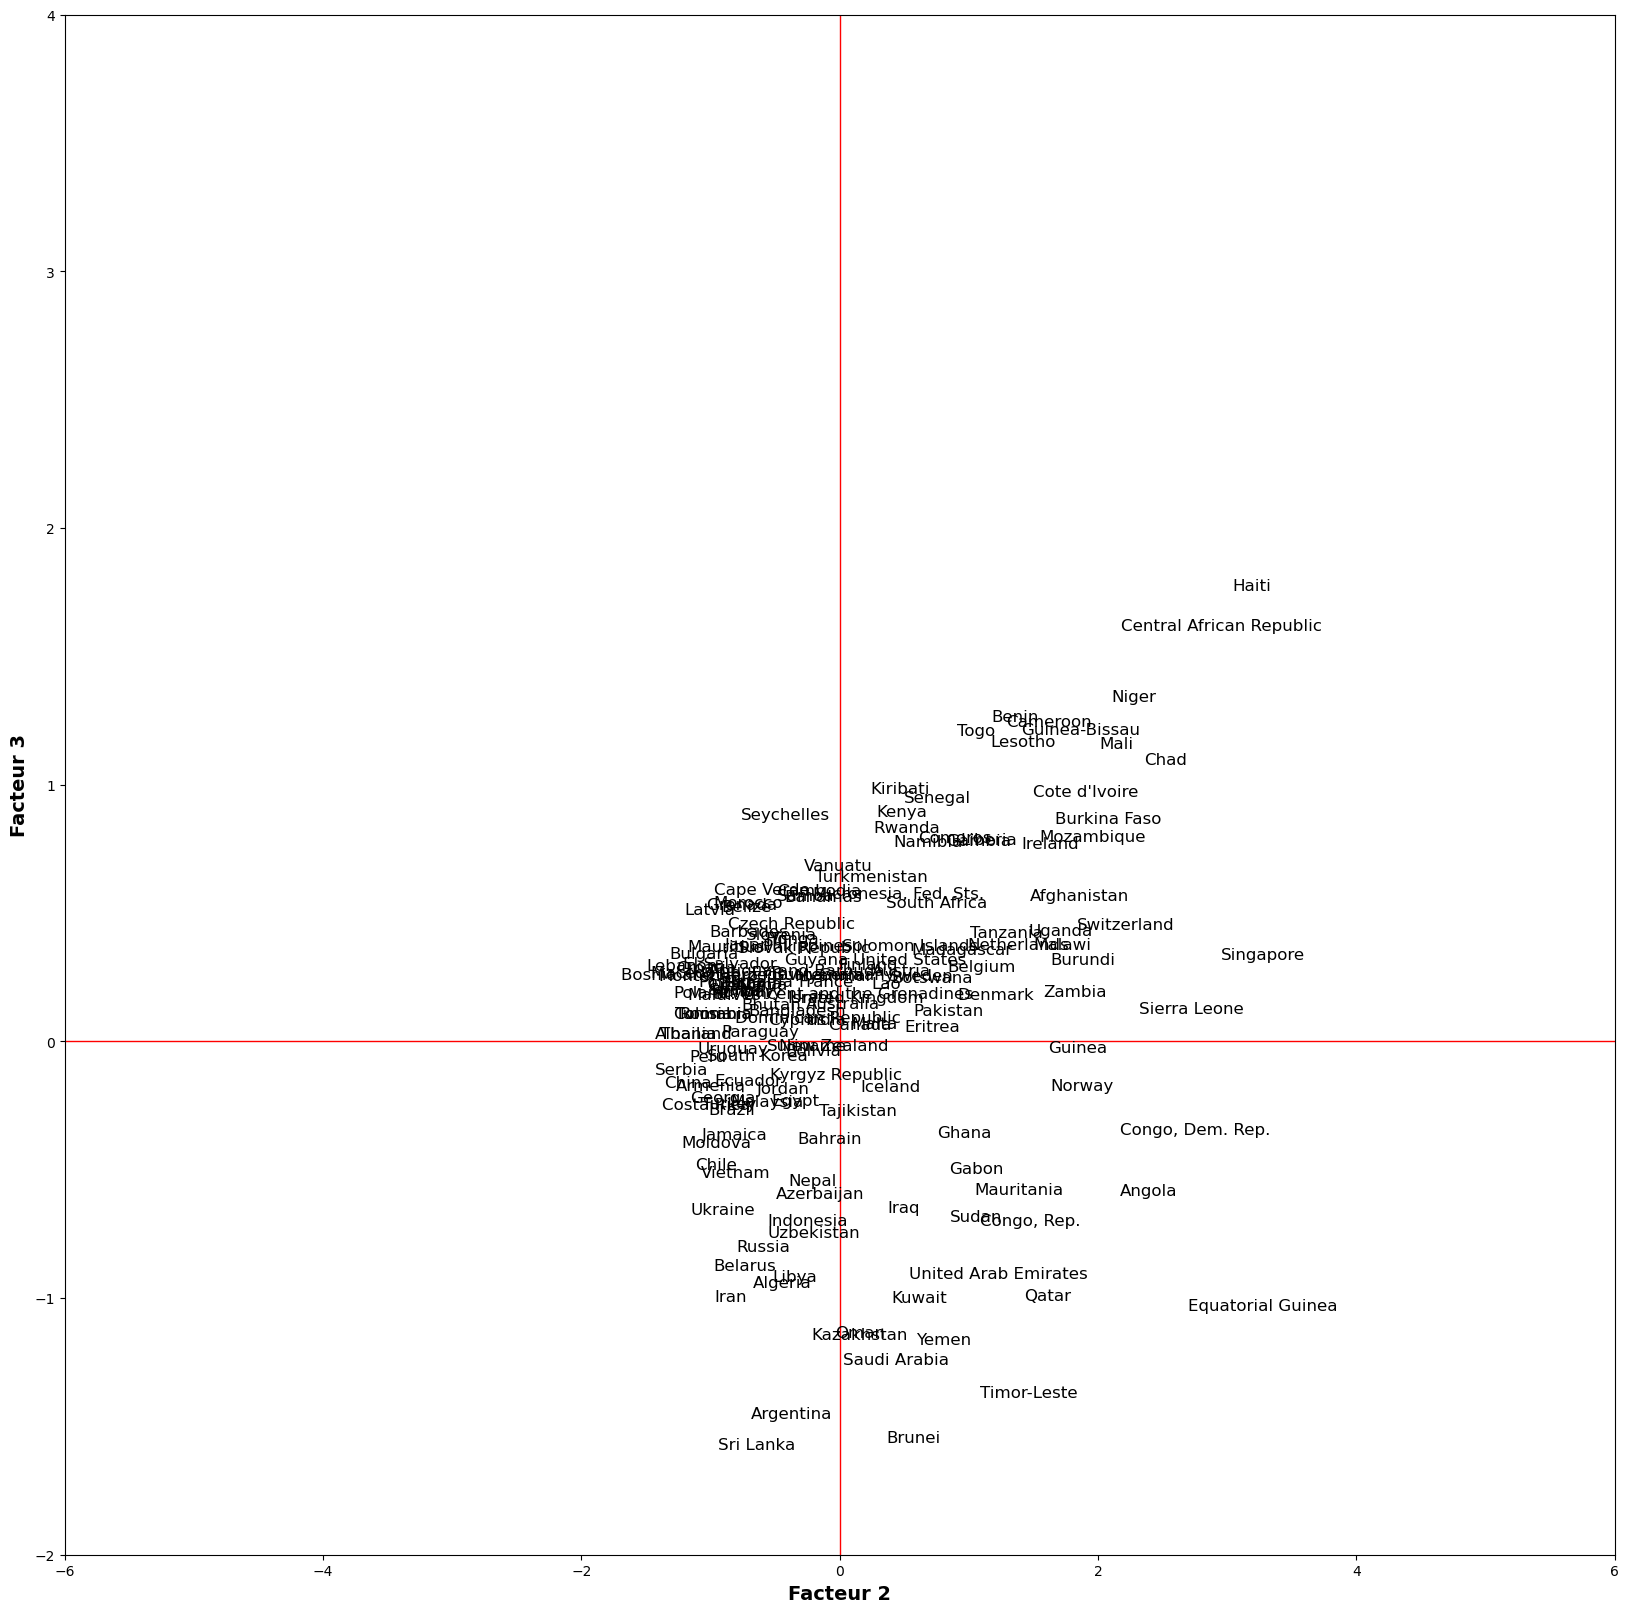

In [61]:
fig, axes = plt.subplots(figsize=(20,20))
limite = 6
axes.set_xlim(-limite,limite)
axes.set_ylim(-limite+4,limite-2)
for i in range(country_data.shape[0]):
    plt.annotate(country_data.Country[i],(country_data_pca[i,1],country_data_pca[i,2]), fontsize=12)
plt.plot([-limite,limite],[0,0],color='red',linestyle='-',linewidth=1)
plt.plot([0,0],[-limite,limite],color='red',linestyle='-',linewidth=1)
plt.xlabel("Facteur 2", fontsize=14,fontweight='bold')
plt.ylabel("Facteur 3", fontsize=14,fontweight='bold')
plt.show()

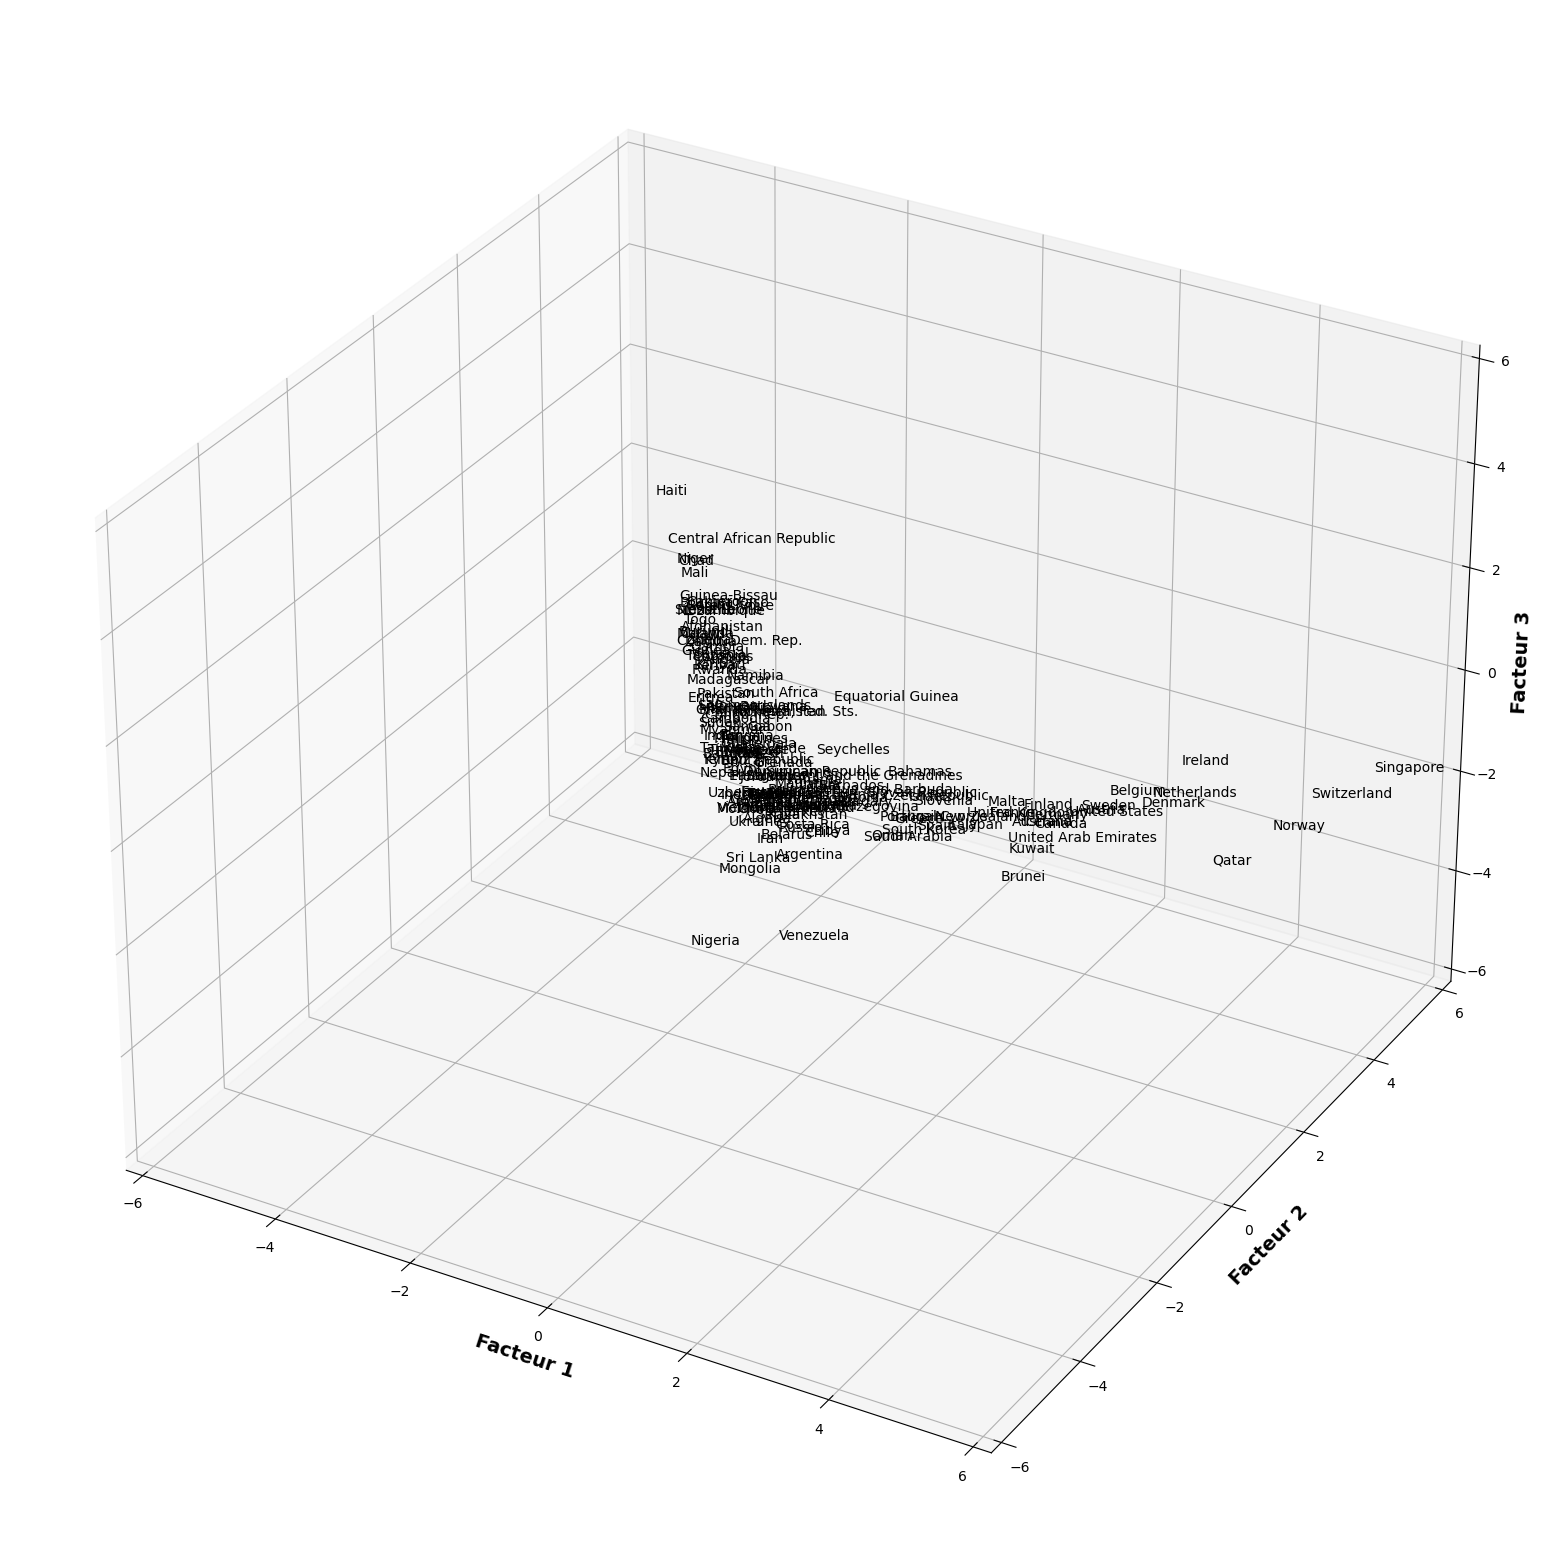

In [62]:
# 3D plot
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-limite,limite)
ax.set_ylim(-limite,limite)
ax.set_zlim(-limite,limite)
for i in range(country_data.shape[0]):
    ax.text(country_data_pca[i,0],country_data_pca[i,1],country_data_pca[i,2],country_data.Country[i])
ax.set_xlabel("Facteur 1", fontsize=14,fontweight='bold')
ax.set_ylabel("Facteur 2", fontsize=14,fontweight='bold')
ax.set_zlabel("Facteur 3", fontsize=14,fontweight='bold')

plt.show()